
# Machine Learning Workshop

## Analisis exploratorio de datos
Dataset source: <br>
https://www.kaggle.com/wenruliu/adult-income-dataset/ <br>
https://archive.ics.uci.edu/ml/datasets/census+income

In [35]:
import pandas as pd
import missingno
from sklearn.metrics import mutual_info_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

# | remove max column restriction for printing DataFrames (default=20)
pd.options.display.max_columns = None 

### 1. Cleaning

<b> 1a) </b> Lea el archivo CSV <i> adult.csv </i> con pandas y guárdelo en un DataFrame. (<i>Hint: Usa el argumento <code>sep</code> de read_csv() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html</i>)

In [36]:
data_path = '../Datasets/adult-incomes.csv'

df = pd.read_csv(data_path, sep=';')

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,rnd,fnlwgt_norm
0,42,Private,247695,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,45,United-States,>50K,53.245295,0.159264
1,33,Private,48520,HS-grad,9,Separated,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,94.849011,0.024514
2,32,Private,447066,Bachelors,13,Married-civ-spouse,Sales,Husband,Black,Male,15024,0,50,United-States,>50K,64.393082,0.294146
3,31,Private,155781,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K,8.115538,0.097080
4,30,Private,108023,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,83.553187,0.064770


#### NaN values 

<b> 1c) </b> Hay valores faltantes en el dataset? (Hint: df.count())

In [37]:
df.count()

age                48942
workclass          48942
fnlwgt             48942
education          48942
educational-num    48942
marital-status     48942
occupation         48942
relationship       48942
race               48942
gender             48942
capital-gain       48942
capital-loss       48942
hours-per-week     48942
native-country     48942
income             48942
rnd                48942
fnlwgt_norm        48942
dtype: int64

<b> 1d) </b> Si df.count() dio el mismo contado para todas las columnas, normalmente esto indica que no hay valores NaN en el DataFrame.
Pero mirando bien los datos, se ve que hay filas con valores '?' que pandas no identificó como valores NaN.

Lea el archivo otra vez, usando el argumento <code>na_values</code> de la funcion <code>pandas.read_csv()</code> y verifica despues si pandas identificó los valores faltantes. (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [38]:
df = pd.read_csv(data_path, sep=';', na_values=['?'])

df.count()

age                48942
workclass          46139
fnlwgt             48942
education          48942
educational-num    48942
marital-status     48942
occupation         46129
relationship       48942
race               48942
gender             48942
capital-gain       48942
capital-loss       48942
hours-per-week     48942
native-country     48082
income             48942
rnd                48942
fnlwgt_norm        48942
dtype: int64

<b> 1e) </b> Donde se ubican los valores faltantes? (<i>Hint: usa la librería "missingno" para hacer una visualización</i>)

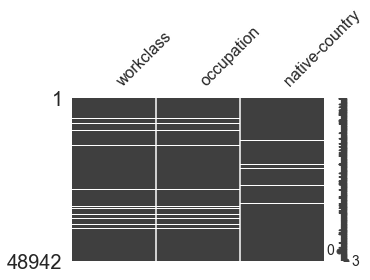

In [39]:
# | get names of columns where values are missing - Method A
sr_counts = df.count()

nan_colnames = sr_counts[sr_counts < len(df)].index

# | plot missing values only of columns where values are missing
missingno.matrix(df[nan_colnames], figsize=(5,3))

<b> 1f) </b> Elimina todas las filas que tienen minimo un valor que hace falta. Cuantas filas se perdieron (numero absuloto & porcentaje)?<br> (<i>Hint: Numero total de filas:</i> <code>len(df)</code>)

In [40]:
nr_rows_orig = len(df)

# | remove all rows that have at least one missing value
df = df.dropna()

# | print number of rows that got deleted
nr_deleted = nr_rows_orig - len(df)
print(f'{nr_deleted} ({nr_deleted*100/nr_rows_orig}%) rows deleted')

3627 (7.4108127988230965%) rows deleted


#### Duplicados

<b> 1g) </b> Hay filas duplicadas en el dataset? Cuantos? Eliminala todos los duplicados! (<i>Hint: </i> <code>DataFrame.drop_duplicates()</code> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

In [41]:
print(f'duplicates: {len(df)-len(df.drop_duplicates())}')

df = df.drop_duplicates()

duplicates: 93


#### Columnas numericas y categoricas

<b> 1h) </b> Cuales de los columnas son numericas y cuales son categoricas? (<i>Hint: </i> <code>df.dtypes</code>)

In [42]:
df.dtypes

age                  int64
workclass           object
fnlwgt               int64
education           object
educational-num      int64
marital-status      object
occupation          object
relationship        object
race                object
gender              object
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country      object
income              object
rnd                float64
fnlwgt_norm        float64
dtype: object

<b> 1i) </b> Separa las columnas numericas y categoricas y guardalas en dos nuevos DataFrames <code>df_num, df_cat</code> (<i>Hint: </i> <code>DataFrame.select_dtypes()</code>)

In [43]:
df_cat = df.select_dtypes(include='object').copy()
df_num = df.select_dtypes(exclude='object').copy()

print(f'numerical: {df_num.columns.tolist()}')
print(f'categorical: {df_cat.columns.tolist()}')

numerical: ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'rnd', 'fnlwgt_norm']
categorical: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


### 2. Análisis & Visualización

#### Columnas numericas - distribuciónes & correlación

<b> 2a) </b> Visualiza las distribuciónes (histogramos) de las columnas numericas, y sus correlaciónes (scatter plots), usando seaborn<br> (<i>Hint: </i> <code>sns.pairplot()</code> https://seaborn.pydata.org/generated/seaborn.pairplot.html)

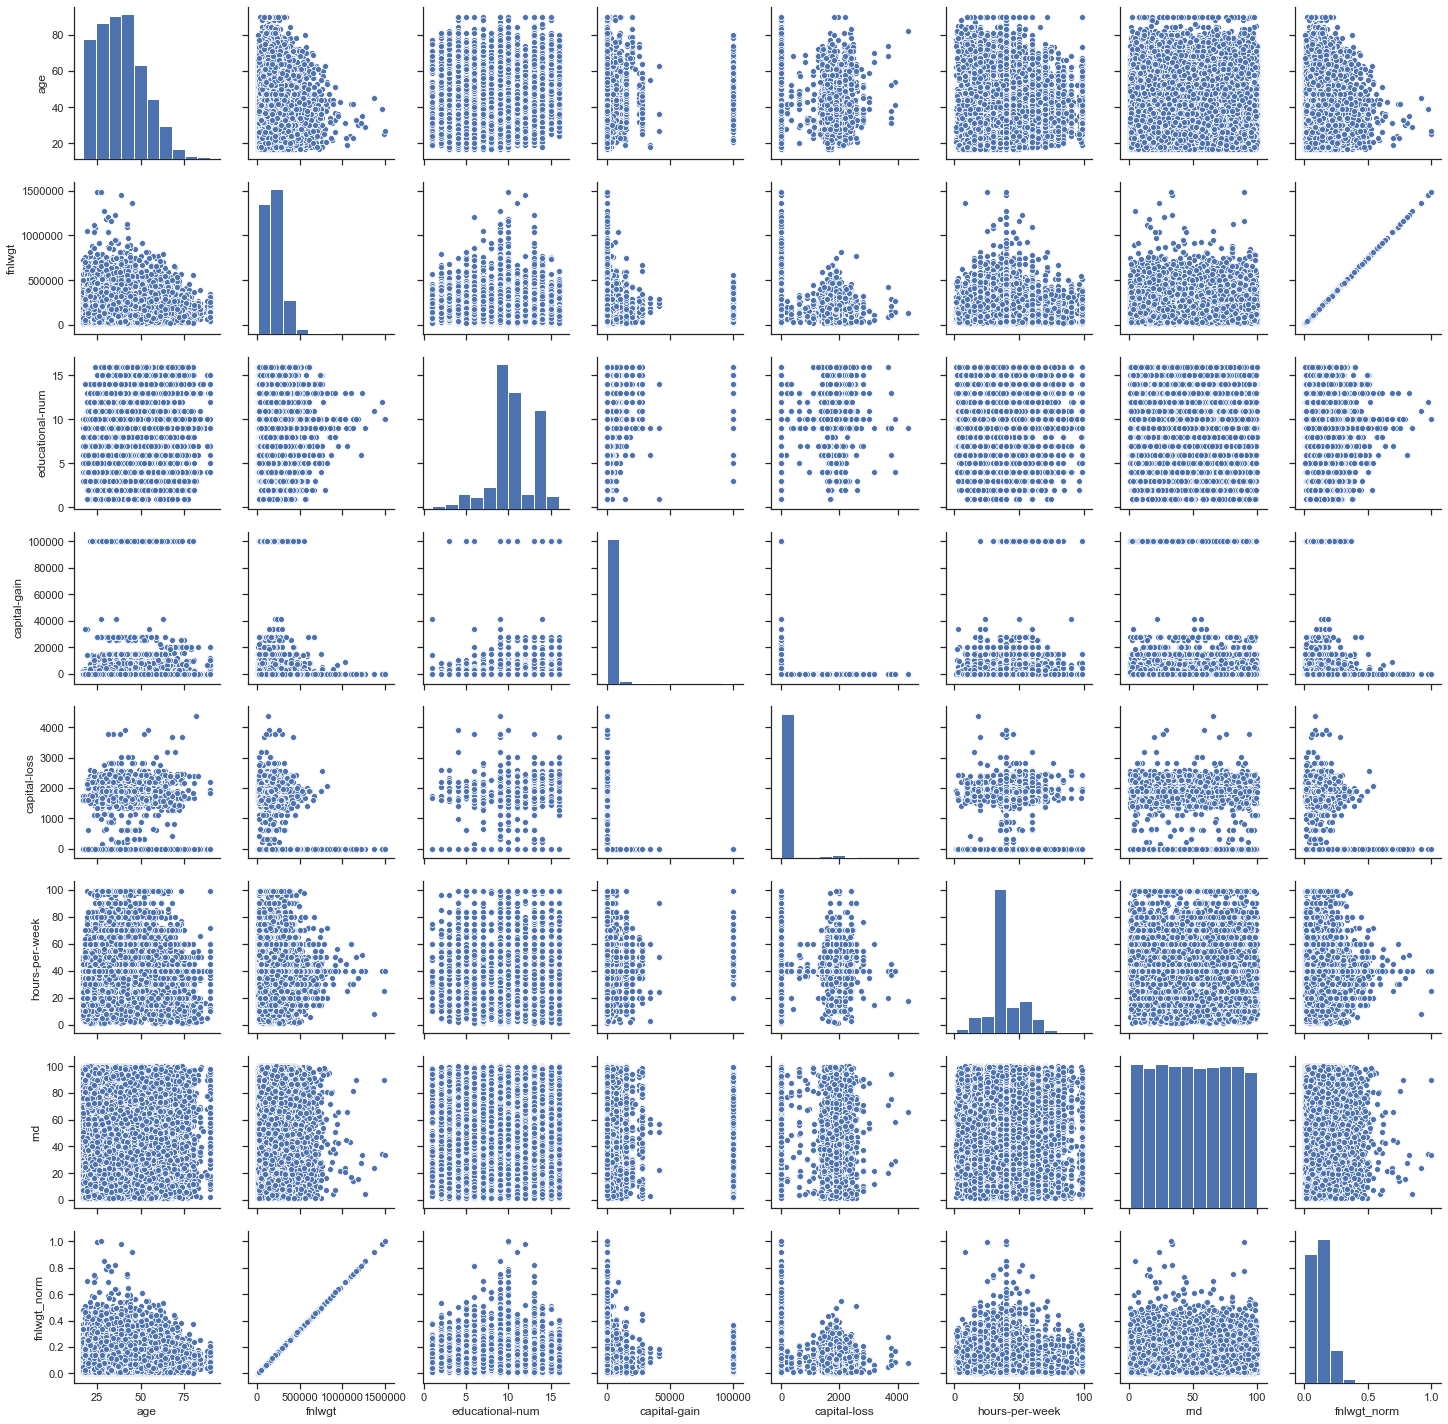

In [23]:
sns.pairplot(df_num)

<b> 2b) </b> Puedes identificar columnas que tienen una correlación alta?

<ul>
    <li>fnlwgt - fnlwgt_norm (correlacion perfecta - estas columnas son completamente redundante)</li>
    <li>fnlwgt - capital-loss</li>
</ul>



<b> 2b) </b> Analisa y describe las distribuciones (histogramos)

<ul>
    <li>La distribución de la columna "rnd" es perfectamente uniforma. (Trampa! Esta columna agregamos nosotros al dataset, con valores random)</li>
    <li>la mayoria de los valores de capital-gain & capital-loss son 0</li>
    <li>la mayoria de las personas son menores de 50 años</li>
    <li>hours-per-week se aproxima a una distribucion normal</li>
</ul>



#### Columnas categoricas

<b> 2c) </b> Visualiza la correlacion entre las columnas "age" y "income". Nota que "age" es una columna numerica, y "income" una columna categorica<br>
(Hint: Usa seaborn: <code>sns.boxplot(x=..., y=..., data=df)</code> https://seaborn.pydata.org/generated/seaborn.boxplot.html)

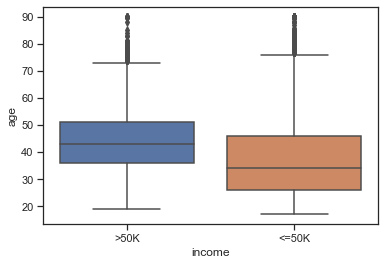

In [44]:
sns.boxplot(x='income', y='age', data=df)

<b> 2d) </b> Visualiza la distribucion de la columna "race". Que puedes observar? (Hint: <code>sns.countplot(x=..., data=...)</code> https://seaborn.pydata.org/generated/seaborn.countplot.html)

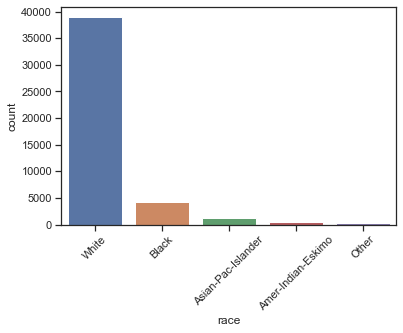

In [45]:
chart = sns.countplot(x="race", data=df)
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

Observaciones: 
- Hay 5 categorías únicas en el atributo de raza.
- La mayoría de ellos son "blancos" (85.50%)
- Este conjunto de datos es totalmente "biased" hacia la raza "blanca".
- La segunda columna importante en el dataset es el "negro" (9.59%)

<b> 2e) </b> Calcula el porcentaje de personas blancas ('race' == 'White') que ganan menos que 50K anual, y el porcentaje de personas negras('race' == 'Black') que ganan menos que 50K<br>

Hint:
<code>
df.loc[(df['income'] == "<=50K") & (df['race'] == "Black")]
</code>

In [46]:
tot_black = len(df_cat.loc[df_cat['race'] == "Black"])
tot_white = len(df_cat.loc[df_cat['race'] == "White"])

nr_black = len(df.loc[(df['income'] == "<=50K") & (df['race'] == "Black")])
nr_white = len(df.loc[(df['income'] == "<=50K") & (df['race'] == "White")])

print(nr_white * 100 / tot_white)
print(nr_black * 100 / tot_black)

73.76294887283757
87.36991485335857


### 3. Machine Learning
Task: Predecir si el ingreso de una persona excede $ 50K / año.<br>
Columna con los labels: 'income'

<b> 3a) </b> Recuerde, para entrenar un modelo de Machine Learning, necesitamos una tabula de solo numeros. <br> 
Convierte las categorias en las columnas categoricas a numeros ("Enumeration"). 

In [27]:
for column in df_cat.columns:
    df_cat.loc[:, column] = df_cat[column].astype('category')
    df_cat.loc[:, column] = df_cat[column].cat.codes

<b> 3b) </b> Ahora concatene los dos DataFrames <code>df_cat, df_num</code> para obtener un solo DataFrame <code>df_all</code> para el entrenamiento del modelo.<br> (Hint: <code>pd.concat(..., axis=1)</code> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

In [15]:
df_all = pd.concat([df_num, df_cat], axis=1)
df_all.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,rnd,fnlwgt_norm,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,42,247695,9,0,0,45,53.245295,0.159264,2,11,2,6,0,4,1,38,1
1,33,48520,9,0,0,40,94.849011,0.024514,2,11,5,5,1,4,1,38,0
2,32,447066,13,15024,0,50,64.393082,0.294146,2,9,2,11,0,2,1,38,1
3,31,155781,13,0,0,40,8.115538,0.097080,2,9,2,11,0,4,1,38,1
4,30,108023,10,0,0,40,83.553187,0.064770,2,15,2,2,0,4,1,38,0


<b> 3c) </b> Usa el siguiente codigo para entrenar un modelo de Machine Learning. El modelo que usamos se llama Random Forest (Vamos a mirar como funciona en el siguiente modulo)

In [16]:
# | split data into features (x) & labels (y)
x = df_all.drop('income', axis=1).values
y = df_all['income'].values

# | split data into training & test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# | train the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=30, n_estimators=100,random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

<b> 3d) </b> Ahora nuestro modelo esta entrenado y guardado en la variable <code>model</code>. Usa la funcion <code>model.predict()</code> para calcular las predicciones en el test-set <code>x_test</code> y calcula el porcentaje de las predicciones que son correctas

In [17]:
y_pred = model.predict(x_test)

sum(y_test == y_pred)*100/len(y_test)

86.18021006080707